# Discrete and Continuous Random Variables

A random variable $X$ is a variable that can take multiple values $X=x_i$ depending on the outcome of a random event. We denote the set of possible values, that can be taken by the variable, by $V(X)$.

If the outcomes are finite (for example the 6 possibilities in a die throwing event) the random variable is said to be **discrete**. If the possible outcomes are not finite, for example, drawing a real number $x \in \left[0,1\right] \subset \mathbb{R}$, the random variable is said to be **continuous**.

The probability that the random variable $X$ takes the value $x$ is dentoted by $P(X=x)$ or for short $P(x)$. The description of the probabilities $P(x)$ for all possible $x \in V(X)$ is called the **probability distribution** of variable $X$.

### Probability Mass Function and Cumulative Distribution Function of Discrete Random Variables

In the case of discrete random variables $X$, the probability distribution is called **probability mass function (pdf) $p_X(x)$**, it assigns to all $x \in V(X)$ the corresponding probability $P(x)$. For all probabilities the following conditions must be satisfied:

$$
\sum\limits_{x \in V(X)} p_X(x) = 1
$$
 
$$
P(X=x)> 0 \quad \forall x \in V(X) 
$$


$$
P(X=x)=0 \quad \forall x \notin V(X) 
$$


The **cumulative distribution function (cdf) $F_X(x)$** of a real-valued random variable $X$ is the probability that $X$ will take a value less than or equal to $x$.

$$
F_X(x) = P(X \leq x)
$$

Hence, the probability that X takes a value larger than $x=a$ and smaller or equal than $x=b$ is:

$$
P(a <x \leq b) = F_X(b) - F_X(a)
$$

Every CDF is non-decreasing and has a maximum value of 1.

#### Discrete Uniform Distribution

For the experiment "rolling a dice" the possible outcomes are 1,2,3,4,5 and 6. The corresponding discrete random variable $X$, has the probability mass function $p_X(x)$, which is defined by:

$$
P(X=1) = P(X=2) = P(X=3) =P(X=4) = P(X=5) = P(X=6)= \frac{1}{6}
$$

Such a distribution, for which $P(x)$ is equal for all $x \in V(X)$ is called a **uniform distribution**. The visualisation of the pdf and the cdf of a uniform distributed discrete variable is plotted below. 

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb

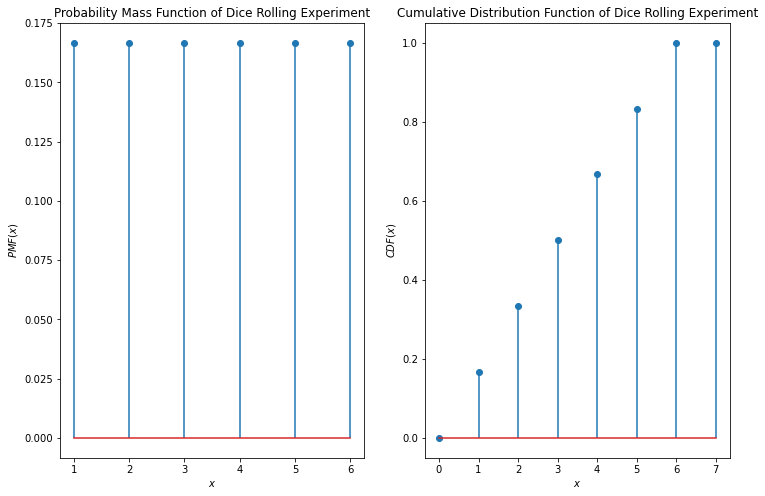

In [87]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.stem(range(1,7),[1/6]*6)
plt.xlabel("$x$"), plt.ylabel("$PMF(x)$"), plt.title("Probability Mass Function of Dice Rolling Experiment")

plt.subplot(1,2,2)
plt.stem(range(0,8),[np.min([1/6*i,1]) for i in range(0,8)])
plt.xlabel("$x$"), plt.ylabel("$CDF(x)$"), plt.title("Cumulative Distribution Function of Dice Rolling Experiment")


plt.show()

#### Bernoulli Distribution

A discrete binary random variable $X$ has only two possible outcomes: $0$ or $1$, i.e. in this case $V(X) = \lbrace 0,1 \rbrace$. The corresponding probability mass function is the **Bernoulli distribution**, which is defined as follows:

$$
p_X(x) = \left\{ 
\begin{array}{ll}
p & \mbox{ for } x=1 \\
1-p & \mbox{ for } x=0
\end{array}
\right.
$$

For example, if the probability $P(X=1)=p=0.7$, the pdf visualisation of the Bernoulli distribution is as plotted below:

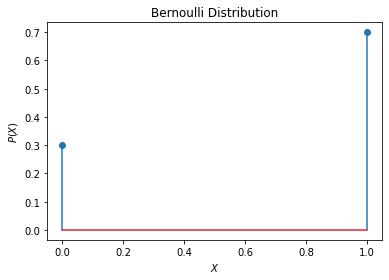

In [50]:
p=0.7
plt.stem([0,1],[1-p,p])
plt.xlabel("$X$"), plt.ylabel("$P(X)$"), plt.title("Bernoulli Distribution")
plt.show()

#### Binomial Distribution

Another important distribution of a discrete random variable is the **Binomial Distribution**. This distribution models the number $k$ of successes when someone draws $n$ times with replacement. Each draw or experiment is independent, with two possible outcomes 0 or 1, where $p$ is the probability that the outcome is 1 (=success). The associated probability mass function is defined by:

$$
\left(
\begin{array}{c}
n \\ 
k
\end{array}
\right) 
p^k (1-p)^{n-k}
$$

For example in a coin-tossing experiment the probability of success is $P(X=1)=p=0.5$. If we toss the coin $n=5$ times the probability, that exactly $k=4$ tosses yield success is

$$
\left(
\begin{array}{c}
5 \\ 
4
\end{array}
\right) 
0.5^4 (1-0.5)^{5-4}
= 0.15625 
$$

The pdf and cdf of binomial distributed variables of different success probabilities $p$ are plotted below:

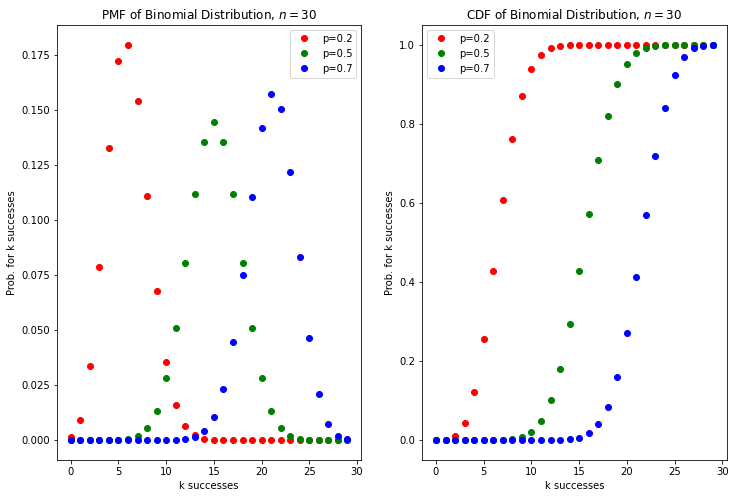

In [94]:
n=30
p_list=[0.2,0.5,0.7]
colors=["r","g","b"]
markers=["o"]
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
for p,c in zip(p_list,colors):
    y=[comb(n,k)*p**k*(1-p)**(n-k) for k in range(n)]
    plt.plot(range(n),y,"o"+c,label="p="+str(p))
plt.xlabel("k successes")
plt.ylabel("Prob. for k successes")
plt.legend()
plt.title("PMF of Binomial Distribution, $n=30$")

plt.subplot(1,2,2)
for p,c in zip(p_list,colors):
    y=[np.sum([comb(n,k)*p**k*(1-p)**(n-k) for k in range(i)]) for i in range(n)]
    plt.plot(range(n),y,"o"+c,label="p="+str(p))
plt.xlabel("k successes")
plt.ylabel("Prob. for k successes")
plt.legend()
plt.title("CDF of Binomial Distribution, $n=30$")
plt.show()    

#### Geometric Distribution

The **Geometric Distribution** describes the number $k$ of trials needed to get one success. Each draw or experiment is independent, with two possible outcomes 0 or 1, where $p$ is the probability that the outcome is 1 (=success). The associated probability mass function is defined by:

$$
(1-p)^{(k-1)} \cdot p
$$

For example for the coin-tossing experiment, the probability that the first success comes 
* at the first toss (k=1) is $$0.5^0 \cdot 0.5 =0.5$$
* at the second toss(k=2) is $$0.5^1 \cdot 0.5 =0.25$$
* at the third toss(k=3) is $$0.5^2 \cdot 0.5 =0.125$$
* ...

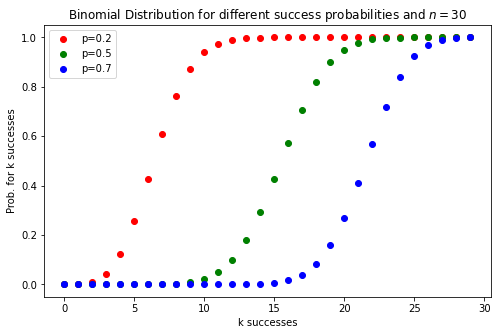

In [91]:
n=30
p_list=[0.2,0.5,0.7]
colors=["r","g","b"]
markers=["o"]
plt.figure(figsize=(8,5))
for p,c in zip(p_list,colors):
    y=[np.sum([comb(n,k)*p**k*(1-p)**(n-k) for k in range(i)]) for i in range(n)]
    plt.plot(range(n),y,"o"+c,label="p="+str(p))
plt.xlabel("k successes")
plt.ylabel("Prob. for k successes")
plt.legend()
plt.title("Binomial Distribution for different success probabilities and $n=30$")
plt.show()  

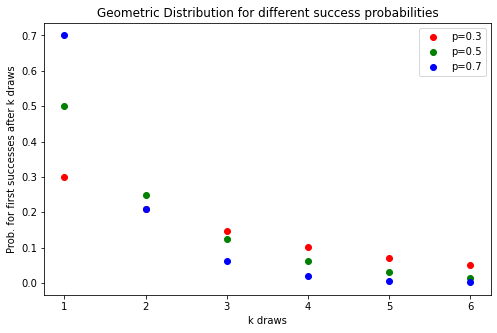

In [52]:
n=7
p_list=[0.3,0.5,0.7]
colors=["r","g","b"]
plt.figure(figsize=(8,5))
for p,c in zip(p_list,colors):
    y=[(1-p)**(k-1)*p for k in range(1,n)]
    plt.plot(range(1,n),y,"o"+c,label="p="+str(p))
plt.xlabel("k draws")
plt.ylabel("Prob. for first successes after k draws")
plt.legend()
plt.title("Geometric Distribution for different success probabilities")
plt.show()    

#### Discrete Variables with infinite value range
For the discrete random variables $X$ considered above, the value range $V(X)$ has always been finite. However, it is also possible to habe an infinite value range for discrete variables. For example an experiment, for which the probability mass function is 

$$
P(X=i)=\frac{1}{2^i}, \, \mbox{ for } i \in 1,2,3,4,\ldots
$$



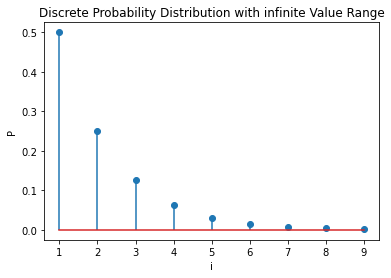

In [56]:
i=range(1,10)
plt.stem(i,[1/2**x for x in i])
plt.xlabel("i")
plt.ylabel("P")
plt.title("Discrete Probability Distribution with infinite Value Range")
plt.show()

### Probability Density Function and Cumulative Distribution Function of Continuous Random Variables

For **continuous** random variables the **probability density function (PDF)** $p_X(x)$ describes the distribution of the random variable $X$ similar as the Probability Mass Function describes the distribution of a discrete random variable. 

The PDF is a function whose value at any given sample (or point) in the sample space can be interpreted as providing a **relative likelihood** that the value of the random variable would equal that sample. In other words, while the absolute likelihood for a continuous random variable to take on any particular value is 0 (since there is an infinite set of possible values to begin with), the value of the PDF at two different samples can be used to infer, in any particular draw of the random variable, how much more likely it is that the random variable would equal one sample compared to the other sample.

In a more precise sense, the PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable's PDF over that range—that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to 1. But in contrast to the PMF, the value of the PDF can be larger than 1:

$$
\int_{-\infty}^{\infty} p_X(x) \cdot dx = 1
$$

$$
p_X(x) > 0 \quad \forall x \in \left] -\infty, +\infty \right[ 
$$


**Cumulative Distribution Function:** As already mentioned above, the values on the y-axis of the PDF do not represent absolute probabilities for the corresponding values on the x-axis. However, the **area under the PDF-curve** between a pair of values $x=a$ and $x=b$, with $a<b$, represents the probability **$P(a< x \leq b)$**.

As in the case of discrete random variables, the **cumulative distribution function (cdf) $F_X(x)$** of a real-valued random variable $X$ measures the probability that $X$ will take a value less than or equal to $x$. In the case of continuous variables this probability is the area under the PDF-curve in the range $\left] -\infty, +\infty \right[$. Hence, the CDF is the integral over the PDF in this range: 


$$
F_X(x)= \int_{-\infty}^{x} p_X(t) \cdot dt
$$

Hence, the probability that the continuous random variable $X$ takes a value in the range between $a$ and $b$ is:

$$
P(a< x \leq b) = F_X(b)-F_X(a)=\int_{a}^{b} p_X(t) \cdot dt.
$$

#### Gaussian Distributed Random Variable

The PDF of a **Gaussian distribed random variable $X$** is: 

$$p_X(x)=\frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}, 
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation. This distribution is plotted below for two different standard deviations. As can be seen on the right hand side of the plot the value of the PDF can be $>0$.

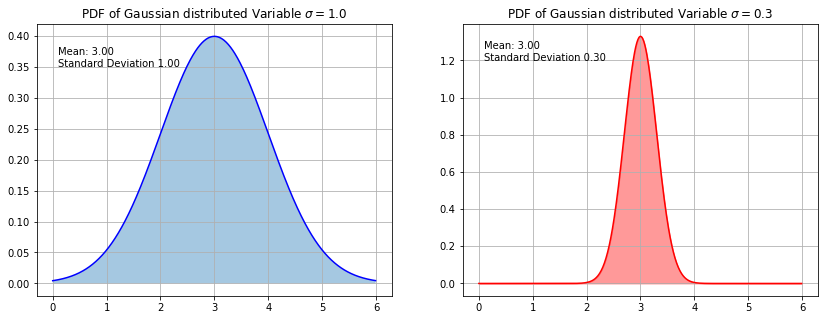

In [135]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
m=3
s=1
x=np.arange(0,6,0.01) # Define the x-values at which the probability distribution shall be plotted
prob=1/(s * np.sqrt(2 * np.pi))*np.exp( - (x - m)**2 / (2 * s**2) )
plt.plot(x,prob,'b')
plt.fill_between(x,prob,alpha=0.4)
plt.text(0.1,0.35,"Mean: %2.2f  \nStandard Deviation %2.2f" % (m,s))
plt.title("PDF of Gaussian distributed Variable $\sigma =1.0$")
plt.grid(True)

plt.subplot(1,2,2)
m=3
s=0.3
prob=1/(s * np.sqrt(2 * np.pi))*np.exp( - (x - m)**2 / (2 * s**2) )
plt.plot(x,prob,'r')
plt.fill_between(x,prob,color="red",alpha=0.4)
plt.text(0.1,1.2,"Mean: %2.2f  \nStandard Deviation %2.2f" % (m,s))
plt.title("PDF of Gaussian distributed Variable $\sigma =0.3$")
plt.grid(True)
plt.show()

The **CDF of a Gaussian** distributed random variable is:

$$
F_X(x)= \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(t-\mu)^2}{2\sigma^2}} \cdot dt = \frac{1}{2} \left(  1+ erf \left( \frac{x-\mu}{\sigma \sqrt{2}}\right)  \right),
$$

where $erf(x)$ denotes the *error function*, which is defined by 

$$
erf(x) =\frac{2}{\sqrt{\pi}} \int_{-\infty}^{x} e^{- t^2} \cdot dt.
$$

**Example:** For a Gaussian distributed random variable $X$ with $\mu=3, \sigma =1$, we like to determine the probability $P(2<x\leq5)$.

For this we can apply the [scipy stats module](https://docs.scipy.org/doc/scipy/reference/stats.html). This module provides pdfs and cdfs for a large bunch of different distributions. Here, we just require the Gaussian normal distribution, which can be imported as follows:

In [150]:
from scipy.stats import norm
np.set_printoptions(precision=3)

We calculate $$cdf(2)=0.159$$ and $$cdf(5)=0.997.$$ The answer is then:

$$P(2<x\leq5)=0.997-0.159 = 0.819$$


In [159]:
m=3
s=1
u=2
v=5
px2=norm.cdf(u,m,s)
print("Probability that value is below {} is {:2.3f}".format(u,px2))
px5=norm.cdf(v,m,s)
print("Probability that value is below {} is {:2.3f}".format(v,px5))
print("Probability that value is between {} and {} is {:2.3f}".format(v,u,px5-px2))

Probability that value is below 2 is 0.159
Probability that value is below 5 is 0.977
Probability that value is between 5 and 2 is 0.819


This calculation is visualized below. The size of the red area under the pdf-curve is $P(2<x\leq5) = 0.819$.

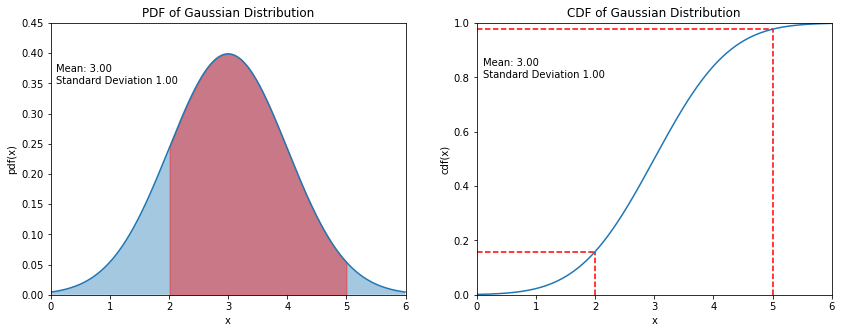

In [160]:
m=3
s=1
plt.figure(figsize=(14,5))
x=np.arange(0,6,0.01)
plt.subplot(1,2,1)
y=norm.pdf(x,m,s)
plt.plot(x,y)
plt.fill_between(x,y,alpha=0.4)
plt.fill_between(x,y,where = (x > 2) & (x <= 5),color="red",alpha=0.4)
plt.xlim(0, 6)
plt.ylim(0,0.45)
plt.text(0.1,0.35,"Mean: %2.2f  \nStandard Deviation %2.2f" % (m,s))
plt.title("PDF of Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.subplot(1,2,2)
y=norm.cdf(x,m,s)
plt.plot(x,y)
plt.xlim(0, 6)
plt.ylim(0,1)
plt.text(0.1,0.8,"Mean: %2.2f  \nStandard Deviation %2.2f" % (m,s))
plt.title("CDF of Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("cdf(x)")
plt.vlines(2,0,px2, linestyles='--', color="red")
plt.vlines(5,0,px5, linestyles='--', color="red")
plt.hlines(px2, 0, 2, linestyles='--', color="red")
plt.hlines(px5, 0, 5, linestyles='--', color="red")
           
plt.show()